# Задача 1

Построить график зависимости термического КПД от давления промежуточного перегрева водяного пара для условий примера: Р0=13 МПа; t0=540 °С; Рк=5 кПа. Параметры промперегрева: Рпп=1, 2, 3, 4, 5, 6 МПа; tпп=540 °С.

In [1]:
import iapws
import array
from typing import Optional, Tuple, List, Union
from iapws import IAPWS97 as gas
from scipy.optimize import minimize
point_type = iapws.iapws97.IAPWS97
import matplotlib.pyplot as plt
import numpy as np

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [3]:
p_0 = 13 * MPa
t_0 = 540
p_k = 5 * kPa
p_middle = [1, 2, 3, 4, 5, 6]
t_middle = 540

In [4]:
def check_is_valid_numerical(values: List[Union[None, float]]) -> None:
    for value in values:
        if value:
            if not isinstance(value, (int, float)):
                raise ValueError(f"Argument should be int or float value! Given {type(value)}")
def construct_cycle_points(
    p_0: Union[int, float],
    p_k: Union[int, float],
    p_middle: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    t_middle: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None,
) -> Tuple[point_type, point_type, point_type]:
    check_is_valid_numerical([p_0, p_k, p_middle, t_0, t_middle, x_0])
    if not t_0 and not x_0:
        raise ValueError("Neither t_0 not x_0 is not provided for start expansion point!")
    if not (p_0 and p_k):
        raise ValueError("P_0 and p_k must be specified!")
    if x_0 and (x_0 > 1 or x_0 < 0):
        raise ValueError("x_0 should be between 0 and 1")
        
    point_0_start = gas(P=p_0 * unit, T=t_0)
    point_0_end = gas(P=p_middle * unit, s=point_0_start.s)
    point_1_start = gas(P=p_middle * unit, T=t_middle)
    point_condenser = gas(P=p_k * unit, s=point_1_start.s)
    point_pump = gas(P=p_k * unit, x=0)
    
    return point_0_start, point_0_end, point_1_start, point_condenser, point_pump

def compute_cycle_efficiency(point_0_start: point_type, point_0_end: point_type, point_1_start: point_type, point_condenser: point_type, point_pump: point_type) -> float:
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    efficiency = round(useful_energy/full_energy*100,3)
    return efficiency
def solve_exercise(
    p_0: Union[int, float],
    p_k: Union[int, float],
    p_middle: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    t_middle: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None,) -> float:
    point_0_start, point_0_end, point_1_start, point_condenser, point_pump = construct_cycle_points(
        p_0=p_0,
        p_k=p_k,
        p_middle=p_middle,
        t_0=to_kelvin(t_0),
        t_middle=to_kelvin(t_middle),
        x_0=x_0
    )
    
    efficiency = compute_cycle_efficiency(point_0_start=point_0_start, point_0_end=point_0_end, point_1_start=point_1_start, point_condenser=point_condenser, point_pump=point_pump)
    
    return efficiency

In [5]:
efficiency = []
for pm_value in p_middle:
    efficiency.append(solve_exercise(p_0=p_0, p_k=p_k, p_middle = pm_value * MPa, t_0 = t_0 , t_middle = t_middle))
efficiency

[44.786, 45.17, 45.222, 45.16, 45.043, 44.897]

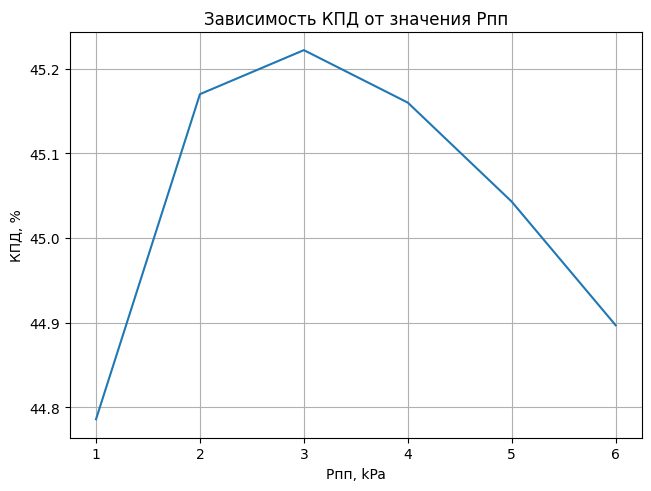

In [6]:
x = p_middle
plt.figure(layout = 'constrained')
plt.plot(x, efficiency)  
plt.xlabel('Pпп, kPa')
plt.ylabel('КПД, %')
plt.title("Зависимость КПД от значения Pпп")
plt.grid()